In [ ]:
!pip install datasets opencv-contrib-python opencv-python matplotlib mlxtend 

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
from tensorflow import keras
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import RandomForestClassifier
import time

dim = 100

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#1- descargar archivo desde https://www.kaggle.com/datasets/kkhandekar/image-dataset
#2- guardar el archivo .zip en google drive
#descomprimir dataset
!unzip "/content/drive/MyDrive/IA/archive.zip"
!mkdir "img_dataset"
! mv _test img_dataset
! mv _train img_dataset

unzip:  cannot find or open /content/drive/MyDrive/IA/dataset.zip, /content/drive/MyDrive/IA/dataset.zip.zip or /content/drive/MyDrive/IA/dataset.zip.ZIP.
mkdir: cannot create directory ‘img_dataset’: File exists
mv: cannot stat '_test': No such file or directory
mv: cannot stat '_train': No such file or directory


In [ ]:
def getClass(clases, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['_train', '_test']
    if not k_fold:
        path = "img_dataset/" + data_type + "/"
        #esto lo puede editar
        for i,f in enumerate(clases):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), "images of " , clases[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "img_dataset/" + v + "/"
            #esto lo puede editar
            for i,f in enumerate(clases):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
        

In [ ]:
def getAllclases():
    clases = []
    for clase_path in glob.glob("img_dataset/_train/*"): #esto lo puede editar
        clase = clase_path.split("/")[-1]
        clases.append(clase)
    return clases

In [ ]:
glob.glob("img_dataset/_train/*")

['img_dataset/_train/person',
 'img_dataset/_train/motorbike',
 'img_dataset/_train/dog',
 'img_dataset/_train/fruit',
 'img_dataset/_train/car',
 'img_dataset/_train/flower',
 'img_dataset/_train/airplane',
 'img_dataset/_train/cat']

In [ ]:
#Choose your clases
clases = ['cat' , 'car'] #Binary classification
#Get Images and Labels
X_t, y_train = getClass(clases, '_train', print_n=True,
k_fold=False)
X_test, y_test = getClass(clases, '_test', print_n=True,
k_fold=False)
#Get data for k-fold
X,y = getClass(clases, '', print_n=True, k_fold=True)
#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])

There are  797   _TRAIN images of  CAT
There are  871   _TRAIN images of  CAR
There are  88   _TEST images of  CAT
There are  97   _TEST images of  CAR


In [ ]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should bethe same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1 

cat


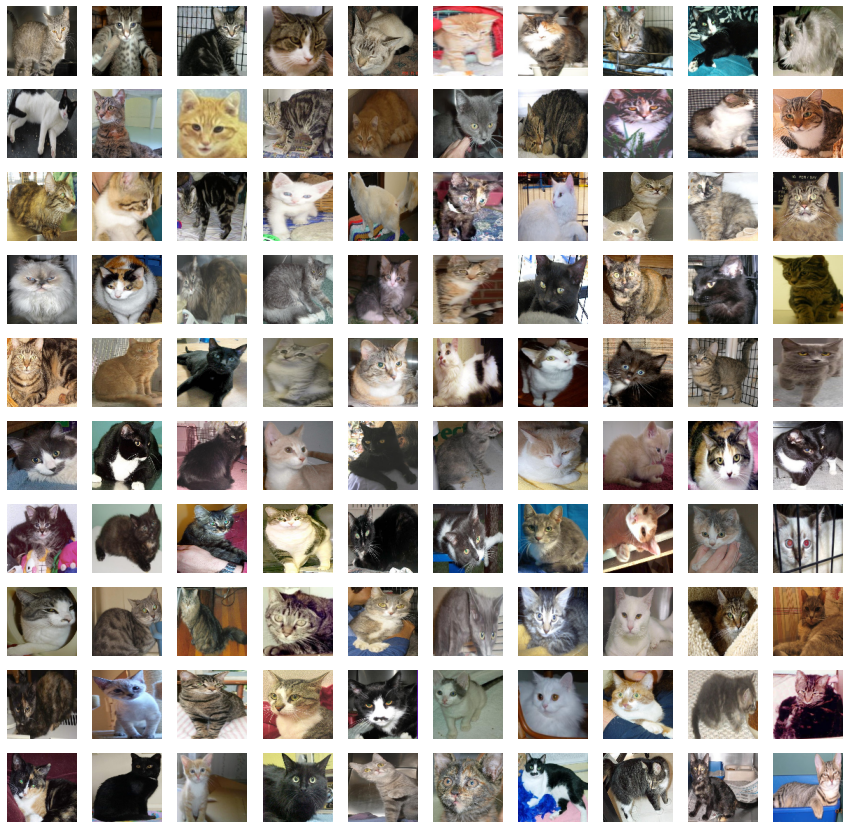

In [ ]:
print(clases[y_train[3]])
plot_image_grid(X_t[:100], 10, 10)

In [ ]:
def getClassNumber(y):
    v =[]
    i=0
    count = 0
    for index in y:
        if(index == i):
            count +=1
        else:
            v.append(count)
            count = 1
            i +=1
    v.append(count)        
    return v

def plotPrincipalComponents(X, dim):
    v = getClassNumber(y_train)
    colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'
    markers = ['o', 'x' , 'v', 'd']
    tot = len(X)
    start = 0
    if(dim == 2):
        for i,index in enumerate(v):
            end = start + index
            plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)], label = clases[i])
            start = end
        plt.xlabel('PC1')
        plt.ylabel('PC2')
   
    if(dim == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i,index in enumerate(v):
            end = start + index
            ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)], label = clases[i])
            start = end
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')


    plt.legend(loc='lower left')
    plt.xticks()
    plt.yticks()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, clases,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    clases = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=clases, yticklabels=clases,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

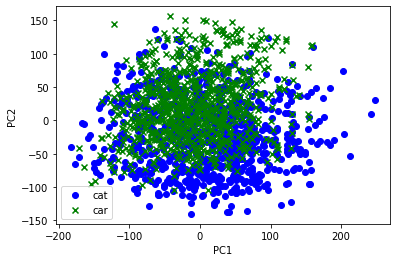

In [ ]:
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn2D, 2)

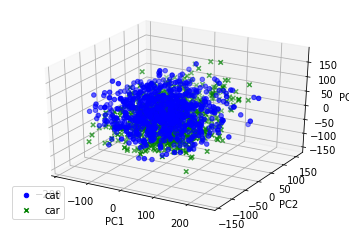

In [ ]:
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn3D, 3)

## SVM

Tiempo entrenamiento:  55.676114082336426
Accuracy with SVM: 90.81%


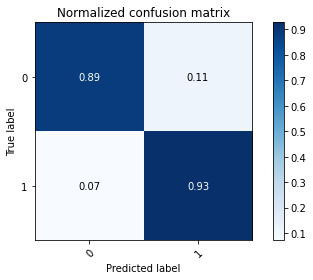

In [ ]:
svm = SVC(gamma='auto', kernel='linear', probability=True)

time1 = time.time()
svm.fit(X_train, y_train)
print("Tiempo entrenamiento: ", time.time() - time1)

y_pred = svm.predict(X_test)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred,clases=y_train,
normalize=True, title='Normalized confusion matrix')
plt.show()
# calculate the FPR and TPR for all thresholds of the classification
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_auc = metrics.roc_auc_score(y_test, probs)

In [ ]:
pred_kfold = cross_val_score(svm, X, y, cv=5)
print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)"
% (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with SVM and K-FOLD CROSS VALIDATION: 0.88 (+/- 0.03)


In [ ]:
print("SVM")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVM
[[78 10]
 [ 7 90]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        88
           1       0.90      0.93      0.91        97

    accuracy                           0.91       185
   macro avg       0.91      0.91      0.91       185
weighted avg       0.91      0.91      0.91       185



##KNN

Tiempo entrenamiento:  0.02660393714904785
Accuracy with K-NN: 65.41%


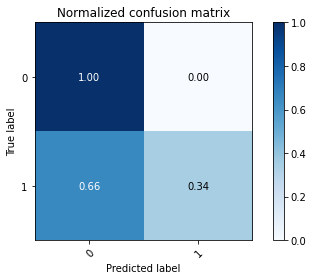

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
time1 = time.time()
knn.fit(X_train, y_train)
print("Tiempo entrenamiento: ", time.time() - time1)

y_pred = knn.predict(X_test)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred, clases=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()
# calculate the FPR and TPR for all thresholds of the classification
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test, probs)
knn_auc = metrics.roc_auc_score(y_test, probs)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[88  0]
 [64 33]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        88
           1       1.00      0.34      0.51        97

    accuracy                           0.65       185
   macro avg       0.79      0.67      0.62       185
weighted avg       0.80      0.65      0.62       185



##Random forest

Tiempo entrenamiento:  2.8452231884002686
Accuracy with Random Forest: 80.54%


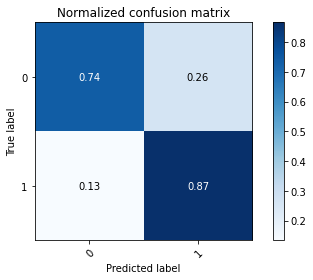

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
time1 = time.time()
rf.fit(X_train, y_train)
print("Tiempo entrenamiento: ", time.time() - time1)
y_pred = rf.predict(X_test)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Random Forest: {0:.2f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred, clases=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()
# calculate the FPR and TPR for all thresholds of the classification
probs = rf.predict_proba(X_test)
probs = probs[:, 1]
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, probs)
rf_auc = metrics.roc_auc_score(y_test, probs)

In [ ]:
print("Random Forest")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Random Forest
[[65 23]
 [13 84]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        88
           1       0.79      0.87      0.82        97

    accuracy                           0.81       185
   macro avg       0.81      0.80      0.80       185
weighted avg       0.81      0.81      0.80       185



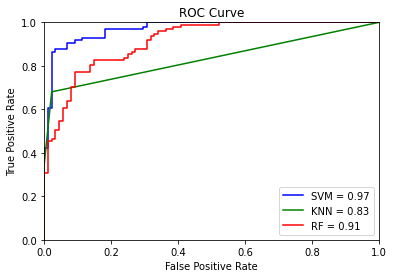

In [ ]:
plt.title('ROC Curve')
plt.plot(svm_fpr, svm_tpr, 'b', label = 'SVM = %0.2f' % svm_auc)
plt.plot(knn_fpr, knn_tpr, 'g', label = 'KNN = %0.2f' % knn_auc)
plt.plot(rf_fpr, rf_tpr, 'r', label = 'RF = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()